# truth-level plot

1. m_ttbar_before_FSR

2. m_ttbar_after_FSR

3. m_bbllvv, p4 construction


In [2]:
import os,shutil
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D, TRatioPlot
from ROOT import gROOT
import helper,painter

In [3]:
filename = "user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
truth = file.Get("truth")

In [4]:
m_ttbar_before_FSR  = TH1D ("m_ttbar_before_FSR ","m_ttbar_before_FSR" ,50 ,300 ,700)
m_ttbar_after_FSR  = TH1D ("m_ttbar_after_FSR ","m_ttbar_after_FSR" ,50 ,300 ,700)
m_bbllvv =  TH1D ("m_bbllvv ","m_bbllvv" ,50 ,300 ,700)

In [5]:
m_ttbar_before_FSR.Reset()
m_ttbar_after_FSR.Reset()
m_bbllvv.Reset()

In [7]:
for n in range(1000):
# for n in range(truth.GetEntries()):
    truth.GetEntry(n)
    m_ttbar_before_FSR.Fill(getattr(truth, "MC_ttbar_beforeFSR_m")/1000)
    m_ttbar_after_FSR.Fill(getattr(truth, "MC_ttbar_afterFSR_m")/1000)
    # b p4
    p4s_b_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_t")
    p4s_b_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_tbar")
    # (llvv)
    MC_Wdecay1_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay1_from_t")
    MC_Wdecay1_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay1_from_tbar")
    MC_Wdecay2_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay2_from_t")
    MC_Wdecay2_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay2_from_tbar")
    p4_sys = p4s_b_from_t_p4 + p4s_b_from_tbar_p4 + MC_Wdecay1_from_t_p4 + MC_Wdecay1_from_tbar_p4 + MC_Wdecay2_from_t_p4 + MC_Wdecay2_from_tbar_p4
    m_bbllvv.Fill(p4_sys.M()/1000)


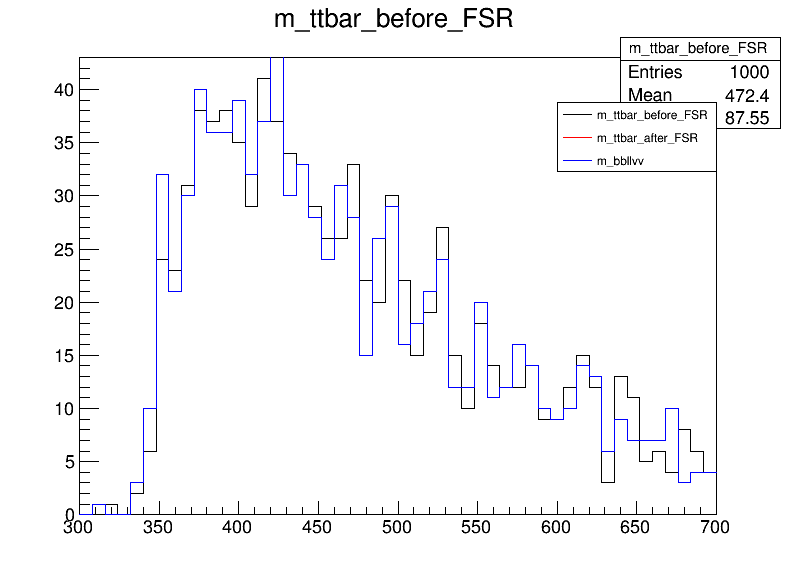

In [8]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
m_ttbar_before_FSR.SetLineColorAlpha(1, 1)
m_ttbar_before_FSR.Draw("")
m_ttbar_after_FSR.SetLineColorAlpha(2, 1)
m_ttbar_after_FSR.Draw("same")
m_bbllvv.SetLineColorAlpha(4,1 )
m_bbllvv.Draw('same')


# rp = TRatioPlot(m_bbllvv,m_ttbar_before_FSR)
# rp.Draw()
# rp.GetLowerRefYaxis().SetTitle("bbllvv/ttbar")
# rp.GetLowerRefYaxis().SetRangeUser(0.5,1.5)
leg = TLegend(0.7,0.7,0.9,0.82)
leg.AddEntry(m_ttbar_before_FSR,"m_ttbar_before_FSR","l")
leg.AddEntry(m_ttbar_after_FSR,"m_ttbar_after_FSR","l")
leg.AddEntry(m_bbllvv,"m_bbllvv","l")
leg.Draw()

c1.Draw()

## ratio plot

In [9]:
# cvs, lgd, diffs = painter.create_standard_canvas_with_diff([m_ttbar_before_FSR,m_ttbar_after_FSR,m_bbllvv], 1, tags= ["m_ttbar_before_FSR","m_ttbar_after_FSR","m_bbllvv"], cms_cvs=True, logy=False, show_unity=True, show_error=True, xtitle="RL", setx=[-3, 1], sety=[0, 80])
# cvs.Draw()

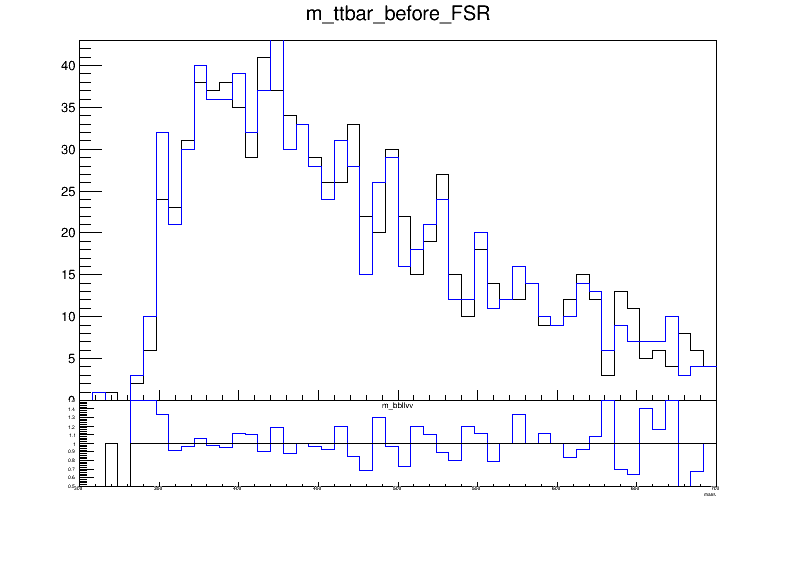

In [10]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()

m_ttbar_before_FSR.Draw()
m_bbllvv.Draw('same')


# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)


ratio = m_bbllvv.Clone("ratio")
ratio.GetYaxis().SetRangeUser(0.5,1.5)
ratio.GetXaxis().SetTitle("mass")
ratio.Divide(m_ttbar_before_FSR)
ratio.Draw("")

ref = m_ttbar_before_FSR.Clone("ref")
ref.Divide(m_ttbar_before_FSR)
ref.Draw("same")
c.Draw()